In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
colors = ['dodgerblue','salmon','mediumseagreen']

# N=16

In [44]:
V_PT_PIMC = [1.5960045888379566, 1.54947507115796, 1.5114973441872617, 1.4779953000826163, 1.4500695847280929, 1.4141344843249832, 1.3851820634166971, 1.354903714322663, 1.3269512793079887, 1.3055072738504876, 1.2764970901884967, 1.258901540029548, 1.248503554720116, 1.2413523182386694, 1.2361180678662742, 1.2335023882145186, 1.2311458266381654, 1.2298840389926078,1.227433198238352]
V_PT_PIMC_err = [0.00035580316211303266, 0.0003329898567278955, 0.00034188122723691964, 0.00032638556053248474, 0.00033837595030027605, 0.00035201734672860865, 0.0003546192500934129, 0.00035334913695127897, 0.0003754566096056561, 0.00040550281492374873, 0.00042217093905799226, 0.0004532156744642555, 0.0005180271713738149, 0.0004897411776389725, 0.0005199884498706253, 0.0005499219417546537, 0.000606898890670794, 0.0006177650762991326,0.0006837228396847693]
# betas = [0.6,0.7,0.8,0.9,1.0,1.15,1.30,1.50,1.75,2.0,2.25,2.50,2.75,3.0,3.25,3.50,3.75,4.0,5.0]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0,7.0]

V_PT_exact = 1.226694406837E+00

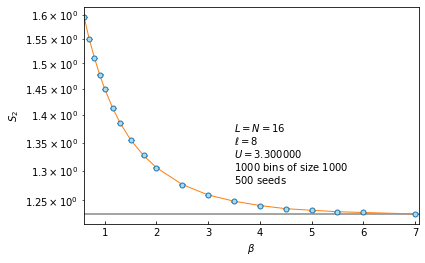

In [45]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,V_PT_PIMC, yerr=V_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,V_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(V_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2FullU3.3_N16_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2FullU3.3_N16_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [46]:
# Load PIMC estimates for various betas
V_PT_PIMC = np.array(V_PT_PIMC)
V_PT_PIMC_err = np.array(V_PT_PIMC_err)

In [47]:
# Compute relative errors
V_PT_relErr = (np.abs(V_PT_PIMC - V_PT_exact)/V_PT_exact)

In [48]:
# Compute the error propagation
V_PT_PIMC_err_err = V_PT_PIMC_err / V_PT_exact

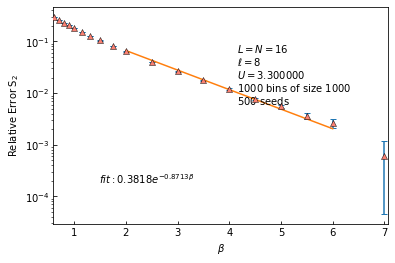

In [49]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],V_PT_relErr[:], yerr=V_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],V_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[9:],np.log(V_PT_relErr)[9:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[9],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Full_N16_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Full_N16_loglinear.png",dpi=400)
plt.show()

### Perform exponential fit

In [50]:
betas[9]

2.0

# N=8

In [19]:
V_PT_PIMC = [6.693781042740036, 6.395550361200019, 6.179833949520034, 6.012649186500044, 5.883039599580051, 5.739577954440056, 5.636025012420058, 5.539610559780059, 5.460411623700059, 5.409829356360057, 5.353960882304666, 5.328595242300055, 5.317238842740054, 5.311612680000055, 5.308844905320055, 5.307590206380054, 5.307277820460055, 5.307288660300054]
V_PT_PIMC_err = [0.0001614936656960262, 0.00015274953147072362, 0.00013999173125924308, 0.00013174907762411557, 0.00014244585757134434, 0.00013748506127761527, 0.00013426243348493662, 0.00014518598550050706, 0.00015184260070822526, 0.00015049986172700912, 0.00016276026768734616, 0.00017390175787867555, 0.0001842146702648613, 0.00019812652297301225, 0.00020449462256114212, 0.0002139954641785008, 0.000215094691807169, 0.00022117893295208398]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

V_PT_exact = 5.3066065551194335

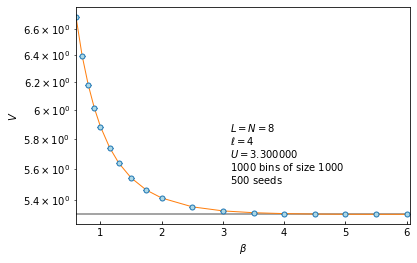

In [28]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,V_PT_PIMC, yerr=V_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,V_PT_PIMC,lw=1)
ax1.set_ylabel(r'$V$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(V_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingVFullU3.3_N8_loglinear.pdf",dpi=400)
plt.savefig("betaScalingVFullU3.3_N8_loglinear.png",dpi=400)

# Relative Errors vs $\beta$

In [21]:
# Load PIMC estimates for various betas
V_PT_PIMC = np.array(V_PT_PIMC)
V_PT_PIMC_err = np.array(V_PT_PIMC_err)

In [22]:
# Compute relative errors
V_PT_relErr = (np.abs(V_PT_PIMC - V_PT_exact)/V_PT_exact)

In [23]:
# Compute the error propagation
V_PT_PIMC_err_err = V_PT_PIMC_err / V_PT_exact

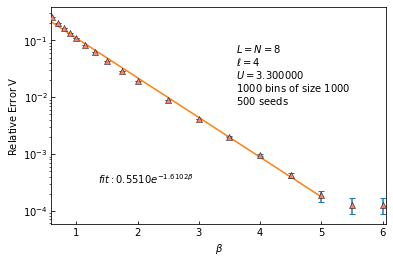

In [27]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],V_PT_relErr[:], yerr=V_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],V_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; V$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[:16],np.log(V_PT_relErr)[:16],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],betas[15],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsVFull_N8_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsVFull_N8_loglinear.png",dpi=400)
plt.show()

# N=4

In [82]:
V_PT_PIMC = [3.000541502639674, 2.8810624781396865, 2.7978209859596954, 2.7337836668997033, 2.6880437588397097, 2.639648215379716, 2.6087317238397207, 2.5826763025797246, 2.565625277819727, 2.5570781590197282, 2.550659185799729, 2.54916347003973, 2.54929775825973, 2.54895968381973, 2.54892771407973, 2.5490309730597303, 2.5488780629397296, 2.5490011905808925]
V_PT_PIMC_err = [0.0001228215301120476, 0.00012872489313936236, 0.00010853120290831155, 0.00011615737649389721, 0.00010942669426509465, 0.00011345290383586935, 0.0001162242112851249, 0.0001145433464773373, 0.000123740303877887, 0.0001294766433285463, 0.0001505736010166996, 0.00015067005531232676, 0.00016103469306400606, 0.00017810661877829914, 0.00017317756860729102, 0.00018724714525304134, 0.0002071219712488186, 0.00018958352407281014]
betas= [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
V_PT_exact = 2.548976013564859

In [83]:
len(betas)

18

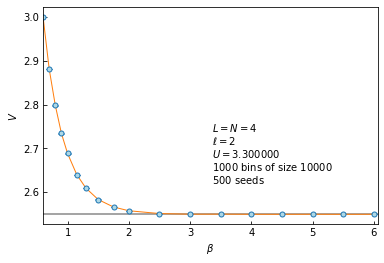

In [84]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,V_PT_PIMC, yerr=V_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,V_PT_PIMC,lw=1)
ax1.set_ylabel(r'$V_$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(V_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
# ax1.set_yscale("log")
plt.savefig("betaScalingV_U3.3_N4.pdf",dpi=400)
plt.savefig("betaScalingV_U3.3_N4.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [85]:
# Load PIMC estimates for various betas
V_PT_PIMC = np.array(V_PT_PIMC)
V_PT_PIMC_err = np.array(V_PT_PIMC_err)

In [86]:
# Compute relative errors
V_PT_relErr = (np.abs(V_PT_PIMC - V_PT_exact)/V_PT_exact)

In [87]:
# Compute the error propagation
V_PT_PIMC_err_err = V_PT_PIMC_err / V_PT_exact

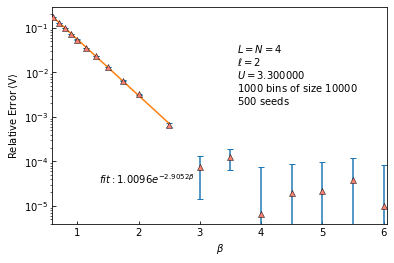

In [88]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],V_PT_relErr[:], yerr=V_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],V_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle V_ \rangle$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[0:11],np.log(V_PT_relErr)[0:11],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],betas[10],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsV__N4_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsV__N4_loglinear.png",dpi=400)
plt.show()

In [81]:
betas[9:]

[2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]